# Dataset Preprocessing

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

### Importing the data

In [2]:
DATA_PATH = "../data/"

path = DATA_PATH + "Telco_customer_churn.xlsx"

#### Importing the data sheets

We import every sheet and look at the first few data points.

#### Original

In [3]:
df_orig = pd.read_excel(path, sheet_name='Telco_Churn')
df_orig.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
# df_orig.info()

#### Status

In [5]:
df_status = pd.read_excel(path, sheet_name="status")
df_status.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,Extra data charges


In [6]:
# df_status.info()

#### Services

In [7]:
df_services = pd.read_excel(path, sheet_name="services")
df_services.head()

,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,None,No,0.00,No,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.00,20,0.00,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,...,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.00,0,390.80,1024.10
2,1658-BYGOY,1,Q3,No,0,18,Offer D,Yes,11.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1752.55,45.61,0,203.94,1910.88
3,4598-XLKNJ,1,Q3,Yes,1,25,Offer C,Yes,19.76,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2514.50,13.43,0,494.00,2995.07
4,4846-WHAFZ,1,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2868.15,0.00,0,234.21,3102.36


In [8]:
# df_services.info()

#### Location

In [9]:
df_location = pd.read_excel(path, sheet_name="location")
df_location.head()

,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237
2,1658-BYGOY,1,United States,California,Los Angeles,90065,"34.108833, -118.229715",34.108833,-118.229715
3,4598-XLKNJ,1,United States,California,Inglewood,90303,"33.936291, -118.332639",33.936291,-118.332639
4,4846-WHAFZ,1,United States,California,Whittier,90602,"33.972119, -118.020188",33.972119,-118.020188


In [10]:
# df_location.info()

#### Population

In [11]:
df_population = pd.read_excel(path, sheet_name="population")
df_population.head()

,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586
2,3,90003,58198
3,4,90004,67852
4,5,90005,43019


In [12]:
# df_population.info()

#### Demographics

In [13]:
df_demographics = pd.read_excel(path, sheet_name="demographics")
df_demographics.head()

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [14]:
# df_demographics.info()

### Concatenation

Let us concatenate the dataframes into a single dataframe as it will be easier to work with. However, we must be careful combining these datasets as we must ensure that the data attributes correspond to the same clients. We also remark that the population dataframe is different from the others as each row does not correspond to a client but an area and an agglomeration of clients. We will see later if/how we can incorporate this into our data. 

Let us see for the other dataframes (excluding population) whether the customer Id's match in every row so that we can merge the data together. We see that not every dataframe has the same label for Customer ID so we first update them. We also see that all the contents of the original dataframe in contained within the four others (status, services, location and demographics).

In [15]:
df_orig.rename(columns={'CustomerID': 'Customer ID'}, inplace=True)

In [16]:
def checkID(dataframes):
    assert len(set(len(dataframe) for dataframe in dataframes)) == 1
    for i in range(len(dataframes[0])):
        for j in range(1, len(dataframes)):
            try:
                assert dataframes[0].iloc[i]["Customer ID"] == dataframes[j].iloc[i]["Customer ID"]
            except:
                print(i, j)
    return "Customer Id's match!"

dataframes = [df_status, df_services, df_location, df_demographics]
checkID(dataframes)

"Customer Id's match!"

We see that these four datasets were indeed designed and created together. Therefore, we can safely concatenate them. 

In [17]:
df = pd.concat([df_status, df_services, df_location, df_demographics], axis=1, join='outer', ignore_index=False, verify_integrity=False)
df.head()

,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,...,Longitude,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,...,-118.156582,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,...,-118.185237,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1
2,1658-BYGOY,1,Q3,2,Churned,Yes,1,81,3179,Competitor,...,-118.229715,1658-BYGOY,1,Male,71,No,Yes,No,Yes,3
3,4598-XLKNJ,1,Q3,2,Churned,Yes,1,88,5337,Dissatisfaction,...,-118.332639,4598-XLKNJ,1,Female,78,No,Yes,Yes,Yes,1
4,4846-WHAFZ,1,Q3,2,Churned,Yes,1,67,2793,Price,...,-118.020188,4846-WHAFZ,1,Female,80,No,Yes,Yes,Yes,1


In [18]:
pop = pd.Series([0] * df.shape[0])
for i in range(df.shape[0]):
    pop[i] = df_population.loc[df_population["Zip Code"] == df.iloc[i]["Zip Code"], "Population"]
df["Population"] = pop

If we set `verify_integrity=True`, we'll find that we have overlapping columns: `Customer ID, Count, Quarter`. Therefore, we remove these duplicate columns from our new dataframe. 

### Removing Duplicates

In [19]:
df = df.loc[:,~df.columns.duplicated()] # Removes duplicates
# df.info()

Having removed duplicates, we now have 51 variables. 

We save the new dataset into a new file so that we do not have to rerun the code every time. 

In [20]:
df.isnull().sum(axis=0)

Customer ID                             0
Count                                   0
Quarter                                 0
Satisfaction Score                      0
Customer Status                         0
Churn Label                             0
Churn Value                             0
Churn Score                             0
CLTV                                    0
Churn Category                       5174
Churn Reason                         5174
Referred a Friend                       0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan            

In [21]:
# df.groupby("Churn Category")["Customer ID"].nunique()

In [22]:
# df.groupby("Churn Reason")["Customer ID"].nunique()

In [23]:
# df.groupby("Churn Label")["Customer ID"].nunique()

In [24]:
# df.groupby("Customer Status")["Customer ID"].nunique()

In [25]:
# df.groupby("Churn Value")["Customer ID"].nunique()

#### Dropping Redundant columns

Remarks: Clearly the customers with the status of "Joined" have been considered as customers who are not going to churn. Decision to be made: Include or not include? We can try both. I propose leaving it for now and then trying running our algorithms at the end of the project. There is an interesting tradeoff. We would expect that removing the 450 or so customers who have only "joined" would make the features of customers who do not churn more precise and increase their importance, improving accuracy. On the other hand we are removing training instances so it may be more difficult to train certain models such as neural networks which require large amounts of data. This is already a medium-sized dataset (not that large) so removing 500 instances is not insignificant.  

It is clear that we must drop some columns such as "Churn Reason", which would immediately inform our algorithms whether a customer churned or not. 

Some of the columns we drop:
- Count: Every value is equal to 1
- Quarter: Every value is equal to Q3
- Country: Every value is equal to "United States"
- State: Every value is equal to "California"
- Churn Category
- Churn Reason
- Churn Value
- Lat long: Concatenates the Lat and Long columns into one

In [26]:
df.drop(columns=["Churn Category", "Churn Reason", "Customer Status", "Churn Value", "Churn Score", "Count", "Quarter", "Lat Long", "State", "Country", "Satisfaction Score"], inplace=True, axis=1)

In [27]:
df["Churn Label"] = df["Churn Label"].eq('Yes').mul(1)

In [28]:
df.head().T

,0,1,2,3,4
Customer ID,8779-QRDMV,7495-OOKFY,1658-BYGOY,4598-XLKNJ,4846-WHAFZ
Churn Label,1,1,1,1,1
CLTV,5433,5302,3179,5337,2793
Referred a Friend,No,Yes,No,Yes,Yes
Number of Referrals,0,1,0,1,1
Tenure in Months,1,8,18,25,37
Offer,None,Offer E,Offer D,Offer C,Offer C
Phone Service,No,Yes,Yes,Yes,Yes
Avg Monthly Long Distance Charges,0,48.85,11.33,19.76,6.33
Multiple Lines,No,Yes,Yes,No,Yes


In [29]:
# df.groupby("City")["Customer ID"].nunique()

### Correlation Statistics

In [30]:
df_copy = df.copy()

In [31]:
df_copy.drop(columns=["Zip Code", "City", "Customer ID"], axis=1, inplace=True)

In [32]:
df_dummies = pd.get_dummies(df_copy)
df_dummies

,Churn Label,CLTV,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,...,Gender_Female,Gender_Male,Under 30_No,Under 30_Yes,Senior Citizen_No,Senior Citizen_Yes,Married_No,Married_Yes,Dependents_No,Dependents_Yes
0,1,5433,0,1,0.00,8,39.65,39.65,0.00,20,...,0,1,1,0,0,1,1,0,1,0
1,1,5302,1,8,48.85,17,80.65,633.30,0.00,0,...,1,0,1,0,0,1,0,1,0,1
2,1,3179,0,18,11.33,52,95.45,1752.55,45.61,0,...,0,1,1,0,0,1,1,0,0,1
3,1,5337,1,25,19.76,12,98.50,2514.50,13.43,0,...,1,0,1,0,0,1,0,1,0,1
4,1,2793,1,37,6.33,14,76.50,2868.15,0.00,0,...,1,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,5306,0,72,22.77,0,21.15,1419.40,19.31,0,...,1,0,1,0,1,0,1,0,1,0
7039,0,2140,1,24,36.05,24,84.80,1990.50,48.23,0,...,0,1,1,0,1,0,0,1,0,1
7040,0,5560,4,72,29.66,59,103.20,7362.90,45.38,0,...,1,0,1,0,1,0,0,1,0,1
7041,0,2793,1,11,0.00,17,29.60,346.45,27.24,0,...,1,0,1,0,1,0,0,1,0,1


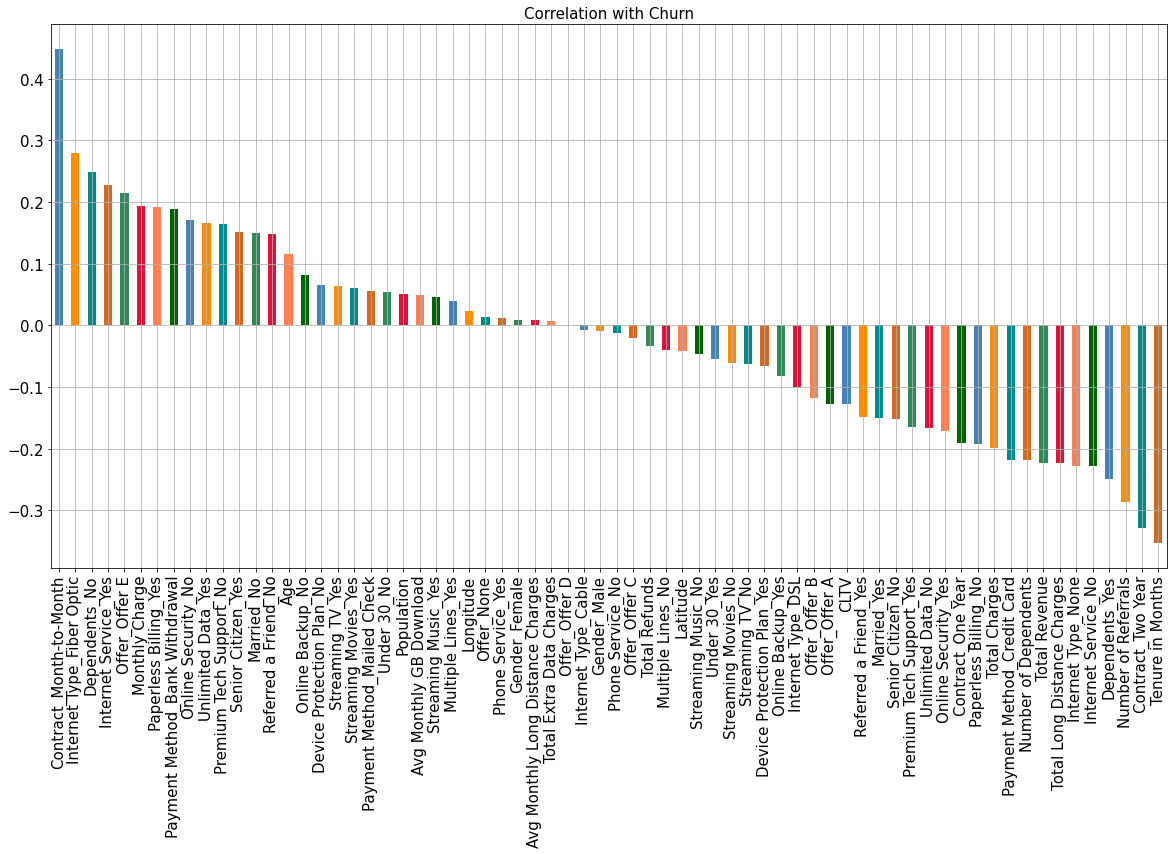

In [33]:
plt.figure(figsize=(20, 10))
correlations = df_dummies.corr()['Churn Label'].sort_values(ascending = False)[1:]

correlations.plot(kind='bar', grid="True", fontsize=15, color=[
    'SteelBlue', 'DarkOrange', 'DarkCyan', 'Chocolate', 'SeaGreen', 'Crimson', 'Coral', 'DarkGreen'])
plt.title("Correlation with Churn", fontsize=15)
plt.show()

In [34]:
correlations_dropped = correlations[abs(correlations) > 0.04]

In [35]:
correlations_small_corr = correlations[abs(correlations) < 0.04]
correlations_small_corr

Longitude                            0.024052
Offer_None                           0.014326
Phone Service_Yes                    0.011942
Gender_Female                        0.008612
Avg Monthly Long Distance Charges    0.008120
Total Extra Data Charges             0.007139
Offer_Offer D                        0.001435
Internet Type_Cable                 -0.007238
Gender_Male                         -0.008612
Phone Service_No                    -0.011942
Offer_Offer C                       -0.020660
Total Refunds                       -0.033709
Name: Churn Label, dtype: float64

Get rid of the ones with correlation less than 0.04 in absolute value.

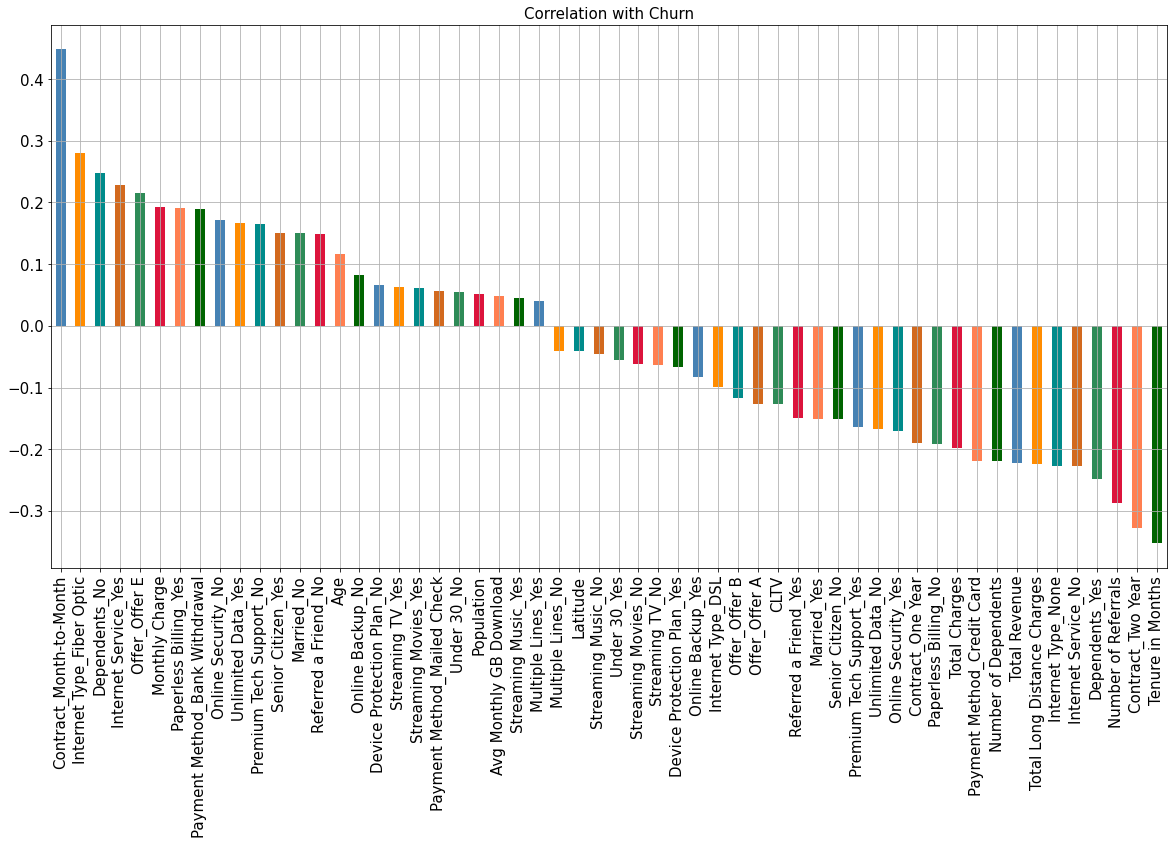

In [36]:
plt.figure(figsize=(20, 10))

correlations_dropped.plot(kind='bar', grid="True", fontsize=15, color=[
    'SteelBlue', 'DarkOrange', 'DarkCyan', 'Chocolate', 'SeaGreen', 'Crimson', 'Coral', 'DarkGreen'])
plt.title("Correlation with Churn", fontsize=15)
plt.show()

## Outliers detection

We would like to identify potential outliers in our dataset using box plots and fill missing values in our numerical variables.

In [37]:
def plotBox(variable):
    fig, axes = plt.subplots(figsize=(9, 3))
    axes = sns.boxplot(x=df[variable], orient="h", ax=axes, whis=1.5, width= 0.6)
    plt.title(variable + ' distribution', fontsize=14)
    plt.xlabel('')
    plt.show()

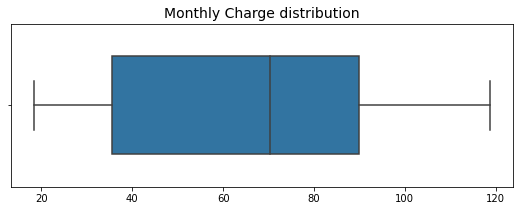

In [38]:
plotBox("Monthly Charge")

In [39]:
def plot_all_boxes(df):
    for column in list(df.columns):
        if df[column].dtype in ['float64', 'int64']:
            plotBox(column)

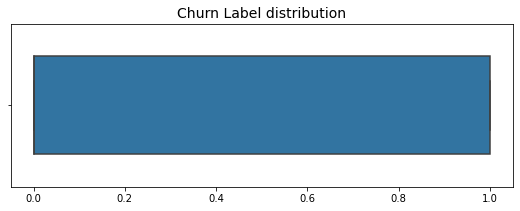

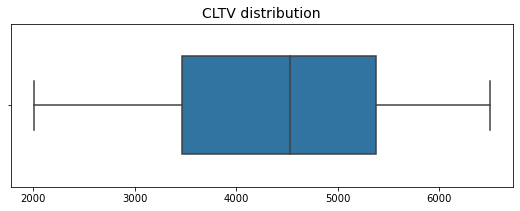

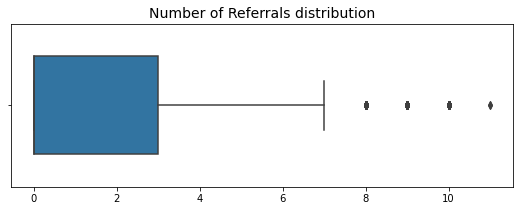

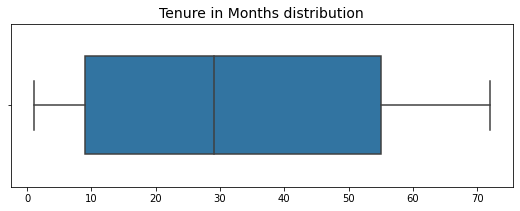

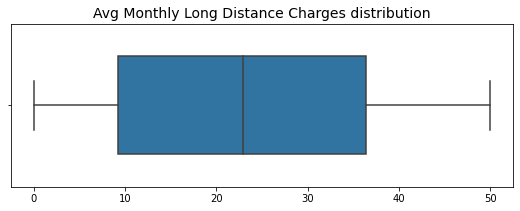

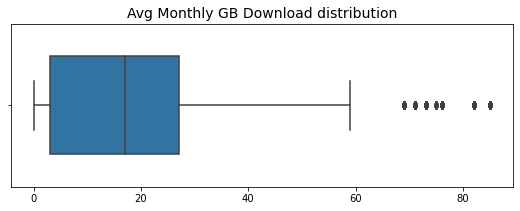

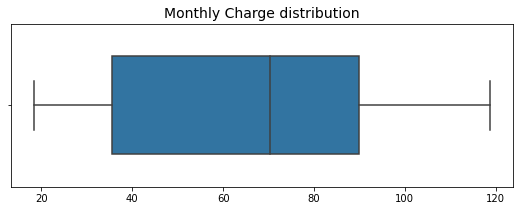

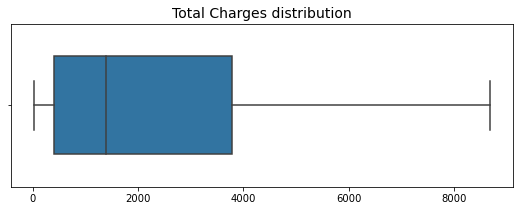

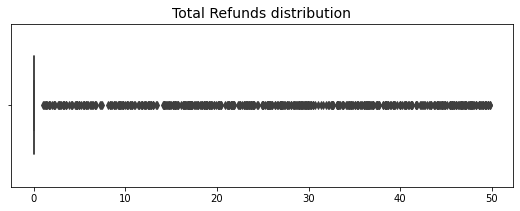

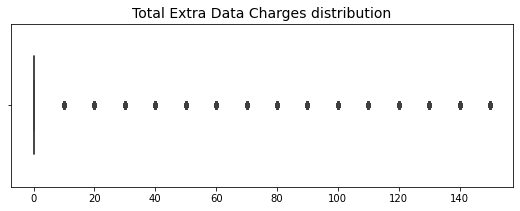

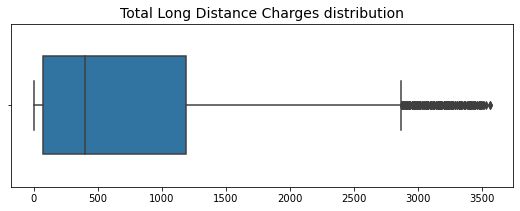

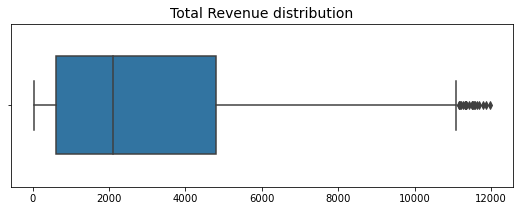

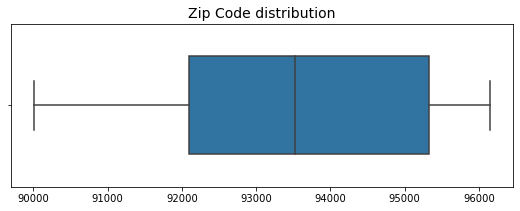

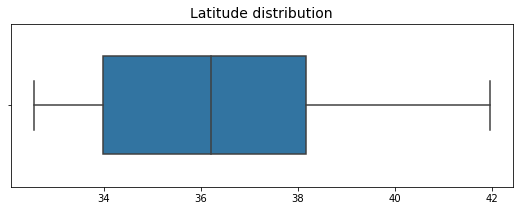

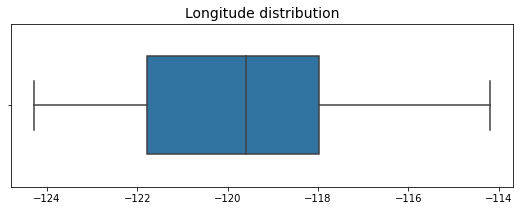

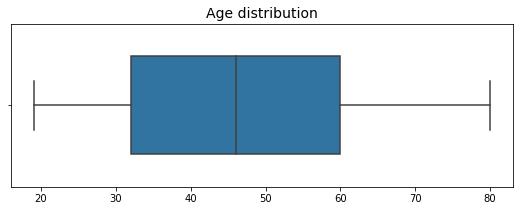

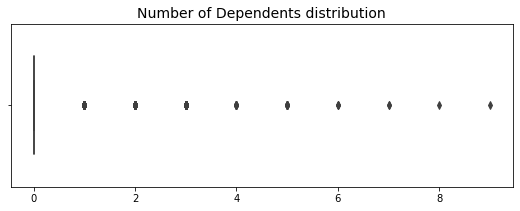

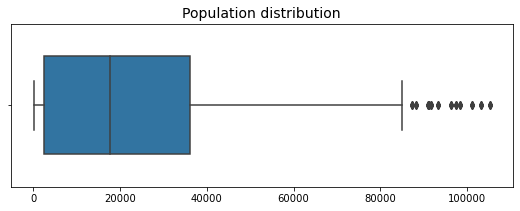

In [40]:
plot_all_boxes(df)

## Bivariate analysis

At this part, we would like to find the relationship between two variables, to be more specific, we will look for the correlation between target and predictor variables. Since our target, `churn`, is a categorical variable, we will do bivariate analysis between categorical and numerical variables and between categorical and categorical variables.

Hence, we will apply to different methods to perform bivariate analysis and find correlation between variables:
    
   1. Numerical and Categorical variables: Point-Biserial correlation (which we can apply since our target is of binary type)
    
   2. Categorical and Categorical variables: Chi-square test 

### Numerical and Categorical variables

In [41]:
def boxPlot(numerical, categorical="Churn Label"):
    fig, axes = plt.subplots(figsize=(5, 6))
    axes = sns.boxplot(x=categorical, y=numerical, data=df[[categorical, numerical]], orient="v", width=0.6 ,ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel(categorical, fontsize=14)
    plt.ylabel(numerical, fontsize=14)
    
    # Point-Biserial correlation
    corr, p_val = stats.pointbiserialr(df[numerical], df[categorical])
    corr = corr.round(2)
    p_val = p_val.round(4)
    
    plt.title("Correlation between " + numerical +" and " + categorical + ": corr = " + str(corr) + 
              " and p-value = " + str(p_val), fontsize=14)
    plt.show()
    
def plotHistogram(numerical, categorical="Churn Label", bins=40):
    ax = df.loc[df[categorical] == 0, numerical].hist(bins=bins, color="blue", alpha=0.5, label="Stay", 
                                                        figsize=(10, 6), grid=False)
    df.loc[df[categorical] == 1, numerical].hist(bins=bins, color="red", ax=ax, alpha=0.5, label="Churn", grid=False)
    ax.legend(fontsize=12);
    
def plotMeans(numerical, categorical="Churn Label"):
    means = df[numerical].groupby(df[categorical]).mean()
    
    fig = plt.figure(figsize=(6, 4))    
    plt.bar(means.index, means, color=['SteelBlue', 'DarkOrange', 'DarkCyan'])
    plt.xticks(np.arange(0, len(means.index)))
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.ylabel("Mean of " + numerical , fontsize=14)
    plt.xlabel(categorical, fontsize=14)
    plt.title("Mean of " + numerical + " w.r.t " + categorical, fontsize=14)
    plt.show()

In [42]:
def get_corr(numerical, categorical="Churn Label"):
    corr, p_val = stats.pointbiserialr(df[numerical], df[categorical])
    corr = corr.round(2)
    p_val = p_val.round(4)
    print(f"Correlation between {numerical} and {categorical}: corr = {str(corr)} and p-value = {str(p_val)}")
    return corr, p_val

In [43]:
def corr_columns(df):
    columns = []
    for column in list(df.columns):
        if df[column].dtype in ['float64', 'int64']:
            corr, p_val = get_corr(column)
            if p_val > 0.05:
                columns.append(column)
    return columns

In [44]:
columns = corr_columns(df)
columns

Correlation between Churn Label and Churn Label: corr = 1.0 and p-value = 0.0
Correlation between CLTV and Churn Label: corr = -0.13 and p-value = 0.0
Correlation between Number of Referrals and Churn Label: corr = -0.29 and p-value = 0.0
Correlation between Tenure in Months and Churn Label: corr = -0.35 and p-value = 0.0
Correlation between Avg Monthly Long Distance Charges and Churn Label: corr = 0.01 and p-value = 0.4957
Correlation between Avg Monthly GB Download and Churn Label: corr = 0.05 and p-value = 0.0
Correlation between Monthly Charge and Churn Label: corr = 0.19 and p-value = 0.0
Correlation between Total Charges and Churn Label: corr = -0.2 and p-value = 0.0
Correlation between Total Refunds and Churn Label: corr = -0.03 and p-value = 0.0047
Correlation between Total Extra Data Charges and Churn Label: corr = 0.01 and p-value = 0.5491
Correlation between Total Long Distance Charges and Churn Label: corr = -0.22 and p-value = 0.0
Correlation between Total Revenue and Chur

['Avg Monthly Long Distance Charges', 'Total Extra Data Charges', 'Zip Code']

**Tenure and Churn**

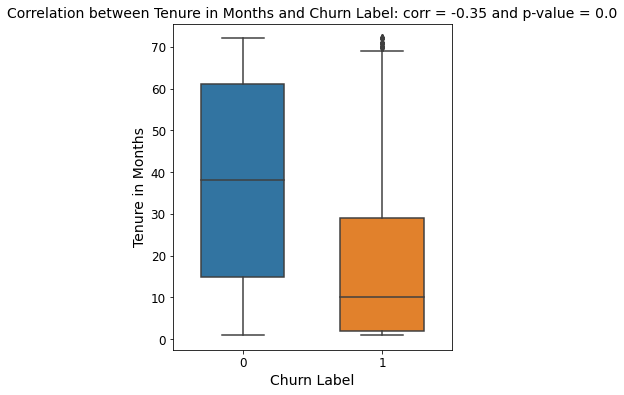

In [45]:
boxPlot("Tenure in Months")

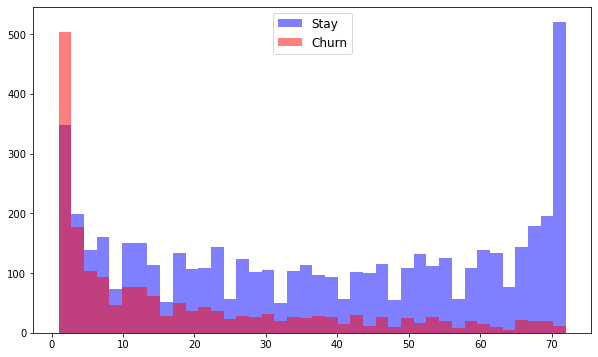

In [46]:
plotHistogram("Tenure in Months")

### Categorical Variables

In [47]:
def plotBar(categorical1, categorical2="Churn Label"):
    fig, axes = plt.subplots(figsize=(7, 6))
    axes = sns.countplot(x=categorical1, hue=categorical2, data=df, ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel(categorical1, fontsize=14)
    plt.title("Absolute count of " + categorical2 + " by " + categorical1, fontsize=15)
    plt.legend(fontsize=13)
    
    fig, axes = plt.subplots(figsize=(7, 6))
    axes = sns.barplot(x=categorical1, y=categorical2, data=df, ax=axes)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.xlabel(categorical1, fontsize=14)
    plt.ylabel(categorical2 + " probability", fontsize=14)
    
def compute_chiSquare(categorical1, categorical2="Churn Label", prob=0.95):
    stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(
        index=df[categorical1], columns=df[categorical2]))
    print("Chi-Squared Test result between " + categorical1 + " and " + categorical2 + ": ", stat, p, dof, expected)
    
    critical = stats.chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    
    alpha = 1 - prob
    if p <= alpha:
        print("Dependent (reject H0)")
    else:
        print("Independent (fail to reject H0)")
    
def Bonferroni_correction(categorical1, categorical2="Churn Label", prob=0.95):
    alpha = (1 - prob) / 3
    encoded = pd.get_dummies(df[categorical1])
    
    for column in encoded.columns:
        stat, p, dof, expected = stats.chi2_contingency(pd.crosstab(
            index=encoded[column], columns=df[categorical2]))
        
        print("Bonferroni correction result between " + categorical1 + "(" + str(column) + ") and " + categorical2 
              + ":", stat, p, dof, expected)
        
        if p <= alpha:
            print("Dependent (reject H0)")
        else:
            print("Independent (fail to reject H0)")
    

In [48]:
def categorical_corr(df):
    for column in list(df.columns):
        if df[column].dtype == 'object' and column not in ['Customer ID', 'Churn Label']:
            compute_chiSquare(column)
            print('\n')

In [49]:
categorical_corr(df)

Chi-Squared Test result between Referred a Friend and Churn Label:  155.9403419629973 8.723767916604251e-36 1 [[2807.0217237 1013.9782763]
 [2366.9782763  855.0217237]]
Dependent (reject H0)
Dependent (reject H0)


Chi-Squared Test result between Offer and Churn Label:  481.7254889632278 7.020357379958891e-102 5 [[2848.16101093 1028.83898907]
 [ 382.00766719  137.99233281]
 [ 605.33522647  218.66477353]
 [ 304.87150362  110.12849638]
 [ 442.24733778  159.75266222]
 [ 591.37725401  213.62274599]]
Dependent (reject H0)
Dependent (reject H0)


Chi-Squared Test result between Phone Service and Churn Label:  0.9150329892546948 0.3387825358066928 1 [[ 501.01774812  180.98225188]
 [4672.98225188 1688.01774812]]
Independent (fail to reject H0)
Independent (fail to reject H0)


Chi-Squared Test result between Multiple Lines and Churn Label:  11.143251001456251 0.0008433795342472428 1 [[2991.41388613 1080.58611387]
 [2182.58611387  788.41388613]]
Dependent (reject H0)
Dependent (reject H0)


Chi

In [50]:
def categorical_corr_bonf(df):
    for column in list(df.columns):
        if df[column].dtype == 'object' and column in ['Internet Type', 'Offer', 'Contract', 'Payment Method']:
            if len(df.groupby(column).nunique()) > 2:
                Bonferroni_correction(column)
            print('\n')

In [51]:
categorical_corr_bonf(df)

Bonferroni correction result between Offer(None) and Churn Label: 1.3809821687293247 0.23993391911921183 1 [[2325.83898907  840.16101093]
 [2848.16101093 1028.83898907]]
Independent (fail to reject H0)
Bonferroni correction result between Offer(Offer A) and Churn Label: 111.88435783732746 3.787714727588396e-26 1 [[4791.99233281 1731.00766719]
 [ 382.00766719  137.99233281]]
Dependent (reject H0)
Bonferroni correction result between Offer(Offer B) and Churn Label: 96.77956946073624 7.749160916533143e-23 1 [[4568.66477353 1650.33522647]
 [ 605.33522647  218.66477353]]
Dependent (reject H0)
Bonferroni correction result between Offer(Offer C) and Churn Label: 2.8106458075764342 0.0936406722528919 1 [[4869.12849638 1758.87150362]
 [ 304.87150362  110.12849638]]
Independent (fail to reject H0)
Bonferroni correction result between Offer(Offer D) and Churn Label: 0.0052038099450785694 0.9424925326947038 1 [[4731.75266222 1709.24733778]
 [ 442.24733778  159.75266222]]
Independent (fail to rejec

In [53]:
sum(df['City'].value_counts() > 10)

80

### Fixing data types

#### Encoding binary values

Multiple binary formats are given by "Yes" and "No" which we must convert appropriately.

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
def object_to_int(df):
    if df.dtype=='object':
        df = LabelEncoder().fit_transform(df)
    return df

In [56]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,Customer ID,Churn Label,CLTV,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Latitude,Longitude,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Population
0,6207,1,5433,0,0,1,0,0,0.00,0,...,34.023810,-118.156582,1,78,0,1,0,0,0,68701
1,5305,1,5302,1,1,8,5,1,48.85,1,...,34.044271,-118.185237,0,74,0,1,1,1,1,55668
2,1129,1,3179,0,0,18,4,1,11.33,1,...,34.108833,-118.229715,1,71,0,1,0,1,3,47534
3,3208,1,5337,1,1,25,3,1,19.76,0,...,33.936291,-118.332639,0,78,0,1,1,1,1,27778
4,3419,1,2793,1,1,37,3,1,6.33,1,...,33.972119,-118.020188,0,80,0,1,1,1,1,26265


In [57]:
# def convert_binary(columns: list):
#     for column in columns:
#         df[column] = df[column].eq('Yes').mul(1)

In [58]:
df.groupby("Phone Service")["Customer ID"].nunique()

Phone Service
0     682
1    6361
Name: Customer ID, dtype: int64

In [59]:
# binary_columns = ["Referred a Friend", "Churn Label", "Under 30", "Senior Citizen", "Married", "Dependents", "Phone Service", "Multiple Lines"]
# convert_binary(binary_columns)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   int64  
 1   Churn Label                        7043 non-null   int64  
 2   CLTV                               7043 non-null   int64  
 3   Referred a Friend                  7043 non-null   int64  
 4   Number of Referrals                7043 non-null   int64  
 5   Tenure in Months                   7043 non-null   int64  
 6   Offer                              7043 non-null   int64  
 7   Phone Service                      7043 non-null   int64  
 8   Avg Monthly Long Distance Charges  7043 non-null   float64
 9   Multiple Lines                     7043 non-null   int64  
 10  Internet Service                   7043 non-null   int64  
 11  Internet Type                      7043 non-null   int64

In [61]:
df.head().T

,0,1,2,3,4
Customer ID,6207.000000,5305.000000,1129.000000,3208.000000,3419.000000
Churn Label,1.000000,1.000000,1.000000,1.000000,1.000000
CLTV,5433.000000,5302.000000,3179.000000,5337.000000,2793.000000
Referred a Friend,0.000000,1.000000,0.000000,1.000000,1.000000
Number of Referrals,0.000000,1.000000,0.000000,1.000000,1.000000
Tenure in Months,1.000000,8.000000,18.000000,25.000000,37.000000
Offer,0.000000,5.000000,4.000000,3.000000,3.000000
Phone Service,0.000000,1.000000,1.000000,1.000000,1.000000
Avg Monthly Long Distance Charges,0.000000,48.850000,11.330000,19.760000,6.330000
Multiple Lines,0.000000,1.000000,1.000000,0.000000,1.000000


### Binning

Categories to bin:
- Total refunds
- CLTV
- Tenure (We may also just standardise)
- Age 

### Age

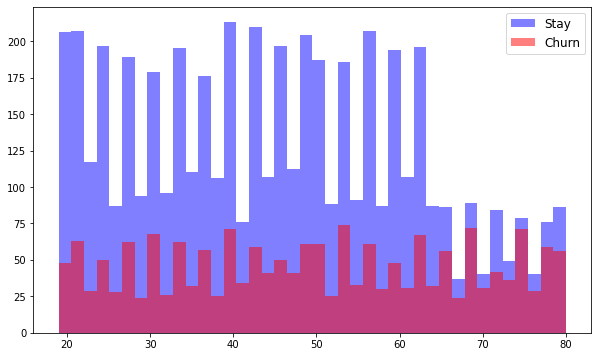

In [64]:
plotHistogram('Age')

In [65]:
age_bins = ['youngAdult', 'Adult', 'Senior']

age_ranges = [19, 29, 65, 80]

df['ageBinned'] = pd.cut(df['Age'], age_ranges, labels=age_bins)

In [66]:
df[['ageBinned', 'Age']]

,ageBinned,Age
0,Senior,78
1,Senior,74
2,Senior,71
3,Senior,78
4,Senior,80
...,...,...
7038,Adult,30
7039,Adult,38
7040,Adult,30
7041,Adult,32


### Total Refunds

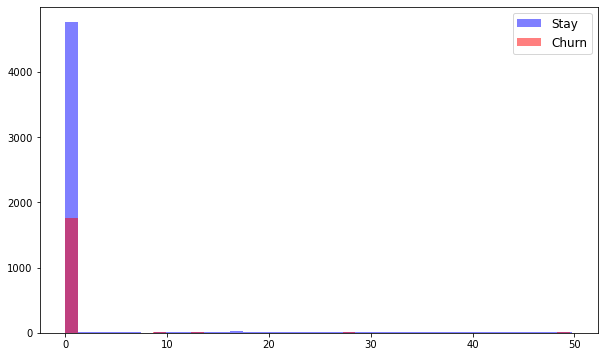

In [67]:
plotHistogram('Total Refunds')

In [68]:
refund_binned = pd.Series(np.where(df['Total Refunds'] == 0, 'No Refund', 'Refund'))

df['refundBinned'] = refund_binned

df[['refundBinned', 'Total Refunds']]

,refundBinned,Total Refunds
0,No Refund,0.00
1,No Refund,0.00
2,Refund,45.61
3,Refund,13.43
4,No Refund,0.00
...,...,...
7038,Refund,19.31
7039,Refund,48.23
7040,Refund,45.38
7041,Refund,27.24


In [69]:
compute_chiSquare('refundBinned')

Chi-Squared Test result between refundBinned and Churn Label:  10.689113925942477 0.001077678111411673 1 [[4788.31918217 1729.68081783]
 [ 385.68081783  139.31918217]]
Dependent (reject H0)
Dependent (reject H0)


### CLTV

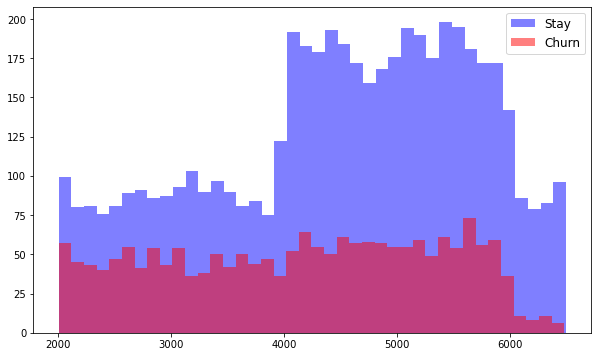

In [70]:
plotHistogram('CLTV')

In [71]:
df['CLTV'].max()

6500

In [72]:
cltv_bins = ['2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-6500']

cltv_ranges = [2000, 3000, 4000, 5000, 6000, 6500]

df['cltvBinned'] = pd.cut(df['CLTV'], cltv_ranges, labels=cltv_bins)

In [73]:
df[['cltvBinned', 'CLTV']]

,cltvBinned,CLTV
0,5000-6000,5433
1,5000-6000,5302
2,3000-4000,3179
3,5000-6000,5337
4,2000-3000,2793
...,...,...
7038,5000-6000,5306
7039,2000-3000,2140
7040,5000-6000,5560
7041,2000-3000,2793


In [74]:
compute_chiSquare('cltvBinned')

Chi-Squared Test result between cltvBinned and Churn Label:  157.5222225841129 4.9690706727656406e-33 4 [[ 868.33281272  313.66718728]
 [ 872.00596337  314.99403663]
 [1544.19253159  557.80746841]
 [1576.51625728  569.48374272]
 [ 312.95243504  113.04756496]]
Dependent (reject H0)
Dependent (reject H0)


### Tenure

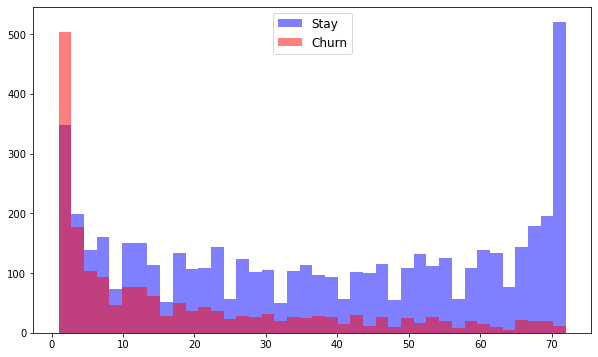

In [75]:
plotHistogram('Tenure in Months')

In [76]:
tenure_bins = ['1', '2-5', '6-10', '11-20', '20-30', '30-40', '40-60', '60-70', '71-72']

tenure_ranges = [0, 1, 5, 10, 20, 30, 40, 60, 70, 72]

df['tenureBinned'] = pd.cut(df['Tenure in Months'], tenure_ranges, labels=tenure_bins)

In [77]:
df[['tenureBinned', 'Tenure in Months']]

,tenureBinned,Tenure in Months
0,1,1
1,6-10,8
2,11-20,18
3,20-30,25
4,30-40,37
...,...,...
7038,71-72,72
7039,20-30,24
7040,71-72,72
7041,11-20,11


In [82]:
compute_chiSquare('tenureBinned')

Chi-Squared Test result between tenureBinned and Churn Label:  1017.4774606386027 2.520422575009352e-214 8 [[450.3282692  162.6717308 ]
 [548.76870652 198.23129348]
 [448.12437882 161.87562118]
 [667.04415732 240.95584268]
 [560.52278858 202.47721142]
 [473.83643334 171.16356666]
 [991.75067443 358.24932557]
 [642.80136306 232.19863694]
 [390.82322874 141.17677126]]
Dependent (reject H0)
Dependent (reject H0)


### One Hot Encoding

In [83]:
df = pd.get_dummies(df, columns=['Internet Type', 'Offer', 'Contract', 'Payment Method', 'ageBinned', 'refundBinned', 'cltvBinned', 'tenureBinned'])

KeyError: "['Contract', 'Payment Method', 'Internet Type', 'Offer'] not in index"

In [63]:
df.columns

Index(['Customer ID', 'Churn Label', 'CLTV', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Avg Monthly GB Download', 'Online Security',
       'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
       'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Paperless Billing', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
       'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Population', 'Internet Type_0',
       'Internet Type_1', 'Internet Type_2', 'Internet Type_3', 'Offer_0',
       'Offer_1', 'Offer_2', 'Offer_3', 'Offer_4', 'Offer_5', 'Contract_0',
       'Contract_1', 'Contract_2', 'Payment Method_0', 'Payment Metho

One hot encoding

- Internet Type
- Offer
- Contract
- Payment Method

Do not one-hot encode ordinal values such as reffer a friend and number of dependents. Standardise and renormalise. 

#### Saving the new data

We save the new data in a new file

In [80]:
df.head().T

,0,1,2,3,4
Churn Label,1,1,1,1,1
CLTV,5433,5302,3179,5337,2793
Referred a Friend,0,1,0,1,1
Number of Referrals,0,1,0,1,1
Tenure in Months,1,8,18,25,37
Phone Service,0,1,1,1,1
Avg Monthly Long Distance Charges,0,48.85,11.33,19.76,6.33
Multiple Lines,0,1,1,0,1
Internet Service,1,1,1,1,1
Avg Monthly GB Download,8,17,52,12,14


In [78]:
df.drop(["Customer ID"], axis=1, inplace=True)

In [79]:
save_file = "Telco_data_clean.csv"

save_path = DATA_PATH + save_file

df.to_csv(save_path)